# Bank Customer Retention Neural Network
### By: Swaraj Tripathy

The goal of this project is to develop a classification model to predict which customers will leave the bank in the next 6 months. This will help the bank investigate deeper into the reason why these customers are leaving and give them an opportunity to convince those customers to stay with policy changes or additional benefits. To complete this analysis, I will be using an artificial neural network to build the classification model.

In [2]:
# load in the necessary packages

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler

#To import different metrics 
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error

#Importing classback API
from keras import callbacks

# Importing tensorflow library
import tensorflow as tf

# importing different functions to build models
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import losses

# Importing Batch Normalization
from keras.layers import BatchNormalization

# Importing backend
from tensorflow.keras import backend

# Importing shffule 
from random import shuffle
from keras.callbacks import ModelCheckpoint

# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

# Importing Classification Report
from sklearn.metrics import classification_report

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

# load in the dataset
raw_data = pd.read_csv("/content/drive/My Drive/Churn.csv")

# make a copy of the dataset to be manipulated
data = raw_data.copy()

Mounted at /content/drive/


In [4]:
# view the first 20 rows of the dataset to make sure it loaded properly
data.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## Exploratory Data Analysis

Looking at the columns in the dataset, we want to remove the RowNumber, CustomerId, and Surname columns as they are not good features for a predictive model. We also typically want to keep the data confidential so we would drop any personal identifucation columns as soon as possible. 

In [5]:
# remove features that we do not want in our model
data = data.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [6]:
# check the shape of the dataset
data.shape

(10000, 11)

In [7]:
# statictical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


The balance variable seems to be left skewed because the median is larger than the mean. The standard deviation and range for this variable are both very high as well. The other variables seem to be relatively normally distributed, but we will explore this further later.

In [8]:
# check the datatypes and null value counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
# check for duplicate rows
data.duplicated().sum()

0

In [10]:
# check for missing values
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
# convert categorical variables to the correct data type
# list of categorical columns
cat_cols = ["Geography", "Gender", "NumOfProducts", "HasCrCard", "IsActiveMember", "Exited"]

# we first want to check the value counts for the categorical columns to make sure they are all reasonable values
for col in cat_cols:
  print(data[col].value_counts())
  print()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Male      5457
Female    4543
Name: Gender, dtype: int64

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

1    7055
0    2945
Name: HasCrCard, dtype: int64

1    5151
0    4849
Name: IsActiveMember, dtype: int64

0    7963
1    2037
Name: Exited, dtype: int64



In [12]:
# now convert the columns to categorical data types
for col in cat_cols:
  data[col] = pd.Categorical(data[col])

# check datatypes to make sure the conversion worked properly
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  category
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  category
dtypes: category(6), float64(2), int64(3)
memory usage: 450.2 KB


In [13]:
# check the balance of the data
data["Exited"].value_counts(normalize = True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

The data is unbalanced with only about 20% of customers who left the bank.

## Univariate Analysis

In [14]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None, hue = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 5, 5))
    else:
        plt.figure(figsize=(n + 5, 5))

    plt.xticks(rotation=45, fontsize=10)
    plt.title(feature + " Distribution")
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
        hue = hue,
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

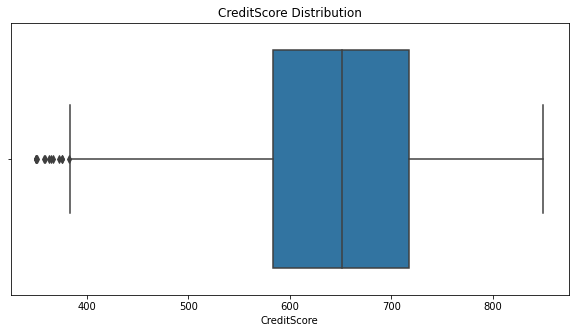

<Figure size 720x360 with 0 Axes>

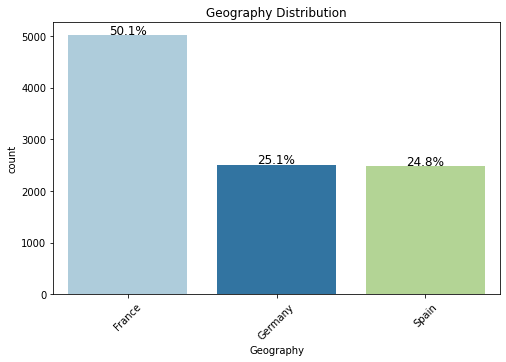

<Figure size 720x360 with 0 Axes>

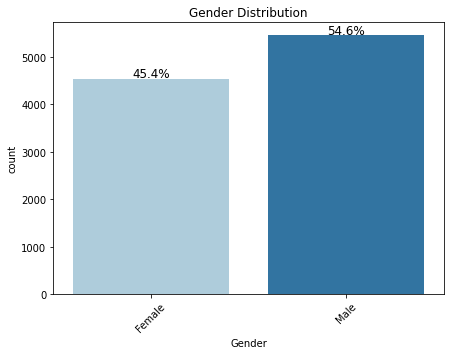

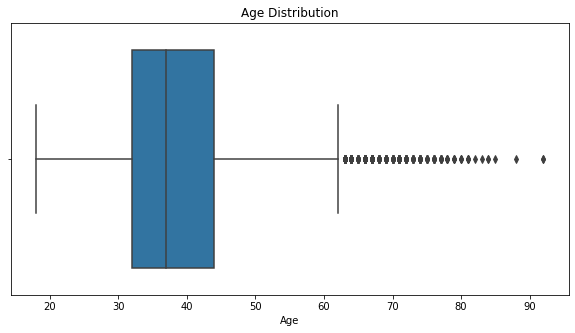

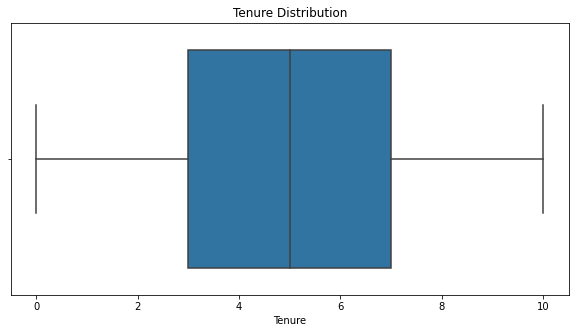

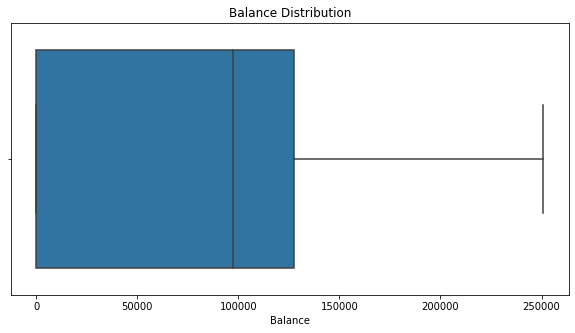

<Figure size 720x360 with 0 Axes>

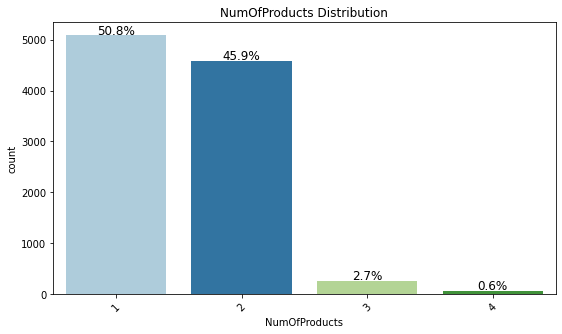

<Figure size 720x360 with 0 Axes>

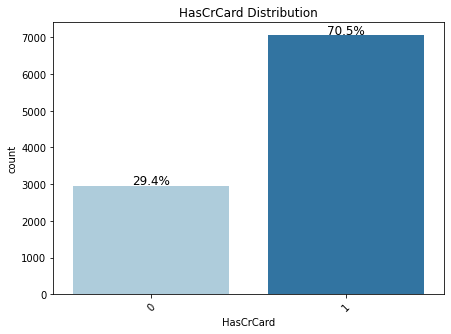

<Figure size 720x360 with 0 Axes>

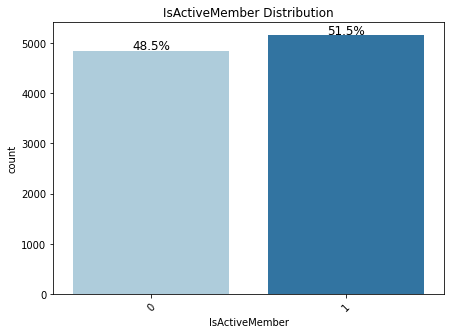

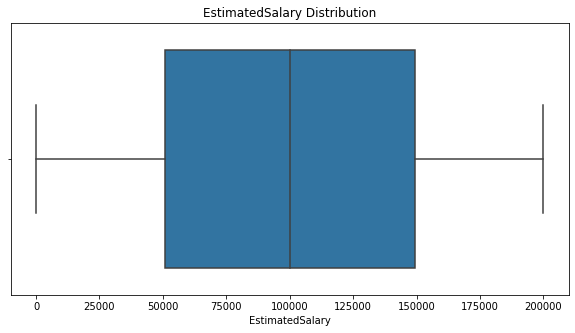

<Figure size 720x360 with 0 Axes>

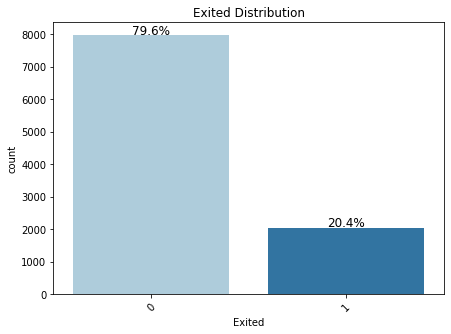

In [15]:
# loop through the columns and create a countplot for categorical variables and a scatterplot for numerical variables
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'float64' or data[feature].dtype == 'int64':
        plt.figure(figsize = (10,5))
        plt.title(feature + " Distribution")
        sns.boxplot(data = data, x = feature)
        plt.show()
    else:
        plt.figure(figsize = (10,5))
        labeled_barplot(data = data, feature = feature, perc = True)
        plt.show()



*   Credit Score is slightly left skewed
*   50% of customers are in France with 25% in both Germany and Spain 
*   55% of customers are male
*   The customer age is right skewed with the median age at 37, but maximum age of 92
*   The tenure is perfectly normally distributed based on the boxplot
*   The balance variable has no outliers, surprisingly. This is likely due to the high standard deviation
*   Most customers have only 1 or 2 products with 51% and 46% respectively in those categories
*   30% of customers do not have a credit card
*   51% of customers are active members of the bank
*   The estimated salary seems to be normally distributed. This is probably by design of the calculation as salary is very rarely normally distributed in reality
*   Only 20% of customers left the bank







## Bivariate Analysis

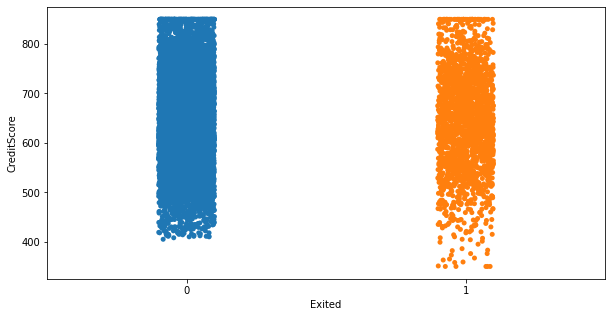

<Figure size 720x360 with 0 Axes>

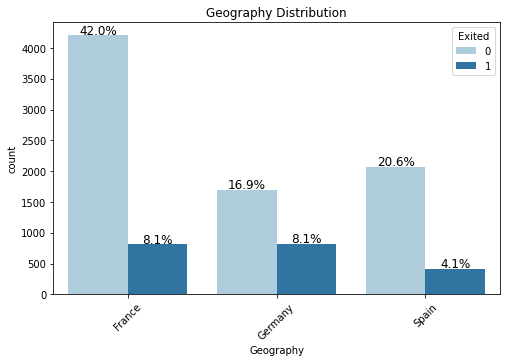

<Figure size 720x360 with 0 Axes>

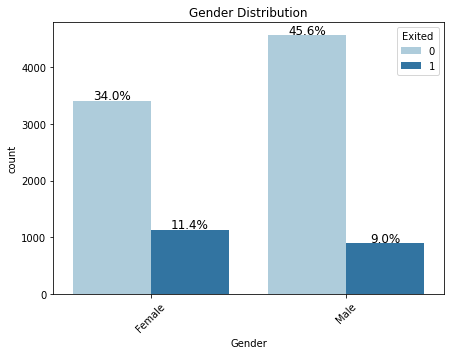

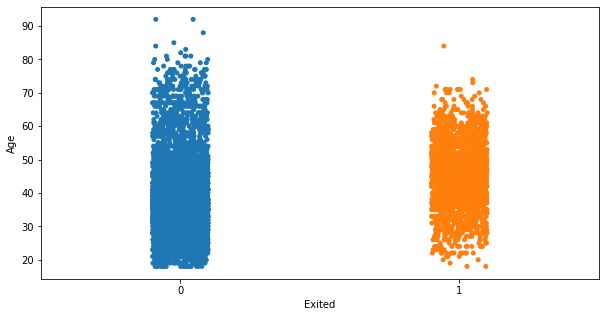

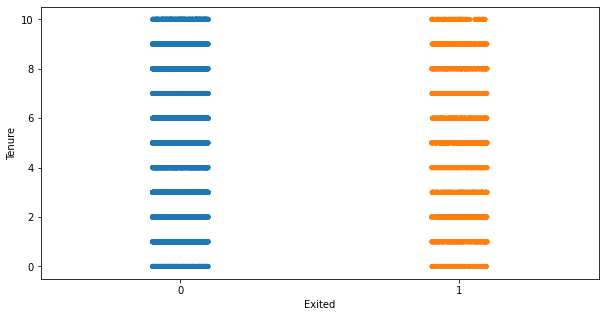

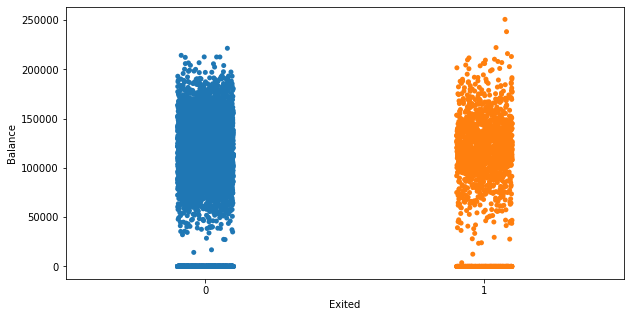

<Figure size 720x360 with 0 Axes>

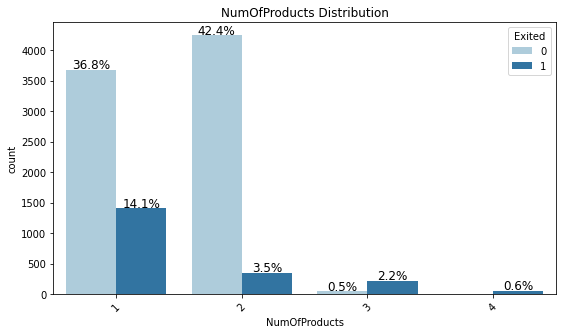

<Figure size 720x360 with 0 Axes>

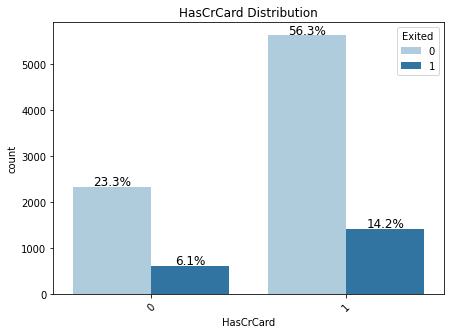

<Figure size 720x360 with 0 Axes>

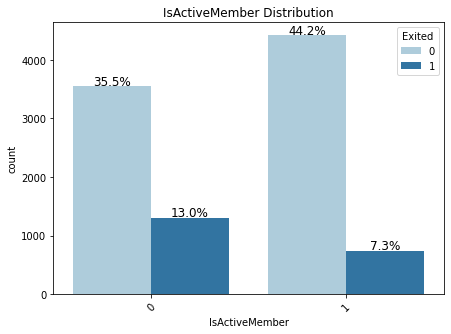

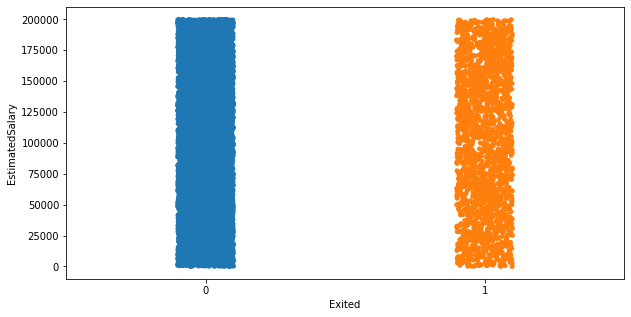

In [16]:
# create a list of the features
features = list(data.columns)
features.remove("Exited")

# loop through list of features to check the relationship betweeen features and target variable
for i in features:
  if data[i].dtype == "category":
    plt.figure(figsize = (10,5))
    labeled_barplot(data = data, feature = i, perc = True, hue = "Exited")
    plt.show()
  else:
    plt.figure(figsize = (10,5))
    sns.stripplot(data = data, x = "Exited", y = i)

*   People with the lowest credit scores under 400, typically leave the bank. People with the highest credit scores were more likely to stay with the bank than leave
*   About half of the people in Germany left the bank while only about 20% left in the other countries
*   A higher percentage of females left the bank than males 
*   More of the youngest ages (< 20) and the oldest ages (> 60) stayed with the bank
*   People at both extremes of bank balances were more likely to stay with the bank
*   Interestingly, customers with more than 2 products of the bank were more likely to leave the bank than stay, but customers with 1 or 2 products were more than twice as likely to stay with the bank
*   Having a credit card with the bank does not affect the likelihood to leave the bank
*   Inactive members of the bank were more likely to leave the bank than active members

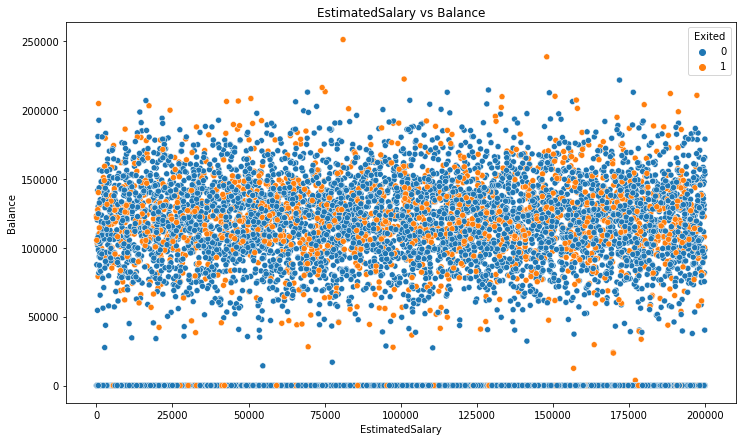

In [17]:
# check if estimated salary is a reflection of bank balance
# we are looking for a linear relationship, if there is one, we will drop one of the variables
plt.figure(figsize = (12,7))
plt.title("EstimatedSalary vs Balance")
sns.scatterplot(data = data, x = "EstimatedSalary", y = "Balance", hue = "Exited");

It seems like there is no linear relationship between the variables, so we can keep both in our analysis going forward.

## Data Preprocessing

In [18]:
# now we want to split the data into our training, validation, and testing sets
##Splitting Independent and dependent variable in X and Y respectively
X = data.drop(['Exited'], axis = 1)
Y = data[['Exited']]

print(X.shape)
print(Y.shape)

(10000, 10)
(10000, 1)


In [19]:
# Splitting the dataset into the Training and Testing set.
X_big, X_test, y_big, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1, shuffle = True)

In [20]:
# Splitting the dataset into the Training and validation set.
X_train, X_val, y_train, y_val = train_test_split(X_big,y_big, test_size = 0.2, random_state = 1,shuffle = True)

In [21]:
data.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts      category
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object

In [22]:
# scaling the data
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

In [23]:
# Using pd.get dummies to encode the categorical columns in the data
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)
X_val = pd.get_dummies(X_val, drop_first = True)  

In [24]:
# Checking the shape
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(6400, 13)
(1600, 13)
(6400, 1)
(1600, 1)
(2000, 13)
(2000, 1)


## Model Building

The first model will be pretty simple with 2 hidden layers. We will not use weight initialization, dropout, or batch normalization yet. We will check if these improve our model later. For hidden layers we will be using the relu activation function, and sigmoid for the output layer activation function as this is a binary classification problem. We will start with the adam optimizer, but try other optimization methods to see if they improve our performance.

In [25]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# Initializing the model
model = Sequential()
# Adding input layer with 64 neurons, relu as activation function 
model.add(Dense(64, activation='relu', input_shape = (13,)))
# Adding the first hidden layer with 32 neurons, relu as activation function 
model.add(Dense(32, activation='relu'))
# Adding the second hidden layer with 32 neurons, relu as activation function 
model.add(Dense(32, activation='relu'))
# Adding the output layer with one neuron and sigmoid as activation
model.add(Dense(1, activation='sigmoid'))

In [26]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,065
Trainable params: 4,065
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Initializing the Optimizer
optimizer = Adam(learning_rate = 0.001)
# Compiling the model with 'mse' as loss function and metrics
model.compile(loss = losses.binary_crossentropy,
              optimizer = optimizer,
              metrics = ["Recall", 'accuracy'])
# Fitting the model on train and validation with 50 epochs
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 50, verbose = 1)

Epoch 1/50
200/200 [==============================] - 2s 5ms/step - loss: 0.4398 - recall: 0.0890 - accuracy: 0.8014 - val_loss: 0.3996 - val_recall: 0.2636 - val_accuracy: 0.8275
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3713 - recall: 0.3715 - accuracy: 0.8448 - val_loss: 0.3785 - val_recall: 0.4091 - val_accuracy: 0.8425
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3519 - recall: 0.4412 - accuracy: 0.8556 - val_loss: 0.3738 - val_recall: 0.4364 - val_accuracy: 0.8475
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3424 - recall: 0.4574 - accuracy: 0.8573 - val_loss: 0.3788 - val_recall: 0.5394 - val_accuracy: 0.8419
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3356 - recall: 0.4752 - accuracy: 0.8630 - val_loss: 0.3712 - val_recall: 0.4485 - val_accuracy: 0.8456
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3301 - recall: 0.4930 - 

In [28]:
# predicting the model on test data
y_pred = model.predict(X_test)

# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1585
           1       0.00      0.00      0.00       415

    accuracy                           0.79      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.79      0.70      2000



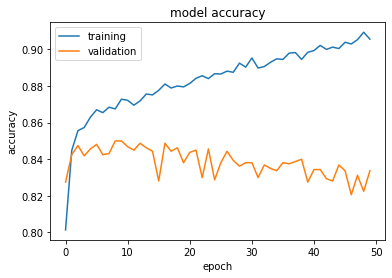

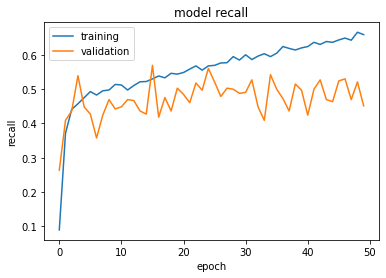

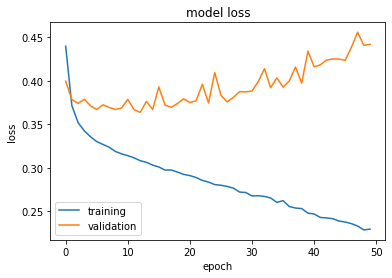

In [29]:
# monitor accuracy, recall, and loss throughout the epochs
    
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

We are most concerned with maximizing recall in this situation because that looks to minimize false negatives, which is when our model predicts a customer will not leave the bank when they actually will. We can see that although the model had 79% classification accuracy and 100% recall for the 0th class, the validation loss started to increase. We can also try early stopping to help with this. This is likely due to a lack of weight initialization. Let's try to implement that and some normalization techniques.

### Model with Weight Initialization

In [30]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Initializing the model
model = Sequential()
# Adding input layer with 64 neurons, relu as activation function, and he_uniform initialization
model.add(Dense(64, activation='relu', kernel_initializer='he_normal', input_shape = (13,)))
# Adding the first hidden layer with 32 neurons, relu as activation function, and he_uniform initialization 
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
# Adding the second hidden layer with 32 neurons, relu as activation function, and he_uniform initialization 
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
# Adding the output layer with one neuron and sigmoid as activation
model.add(Dense(1, activation='sigmoid'))

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,065
Trainable params: 4,065
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Initializing the Optimizer
optimizer = Adam(learning_rate = 0.001)
# Compiling the model with 'mse' as loss function and metrics
model.compile(loss = losses.binary_crossentropy,
              optimizer = optimizer,
              metrics = ["Recall", 'accuracy'])
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta = 0.001, patience = 5)
# Fitting the model on train and validation with 50 epochs
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 50, verbose = 1, callbacks = es_cb)

Epoch 1/50
200/200 [==============================] - 2s 6ms/step - loss: 0.4569 - recall: 0.1122 - accuracy: 0.7784 - val_loss: 0.4050 - val_recall: 0.3333 - val_accuracy: 0.8225
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3822 - recall: 0.3529 - accuracy: 0.8369 - val_loss: 0.3868 - val_recall: 0.3606 - val_accuracy: 0.8369
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3597 - recall: 0.4133 - accuracy: 0.8527 - val_loss: 0.3788 - val_recall: 0.4273 - val_accuracy: 0.8406
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3486 - recall: 0.4543 - accuracy: 0.8567 - val_loss: 0.3857 - val_recall: 0.5242 - val_accuracy: 0.8400
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3403 - recall: 0.4636 - accuracy: 0.8587 - val_loss: 0.3776 - val_recall: 0.4576 - val_accuracy: 0.8431
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3339 - recall: 0.4822 - 

In [32]:
# predicting the model on test data
y_pred = model.predict(X_test)

# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1585
           1       0.00      0.00      0.00       415

    accuracy                           0.79      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.79      0.70      2000



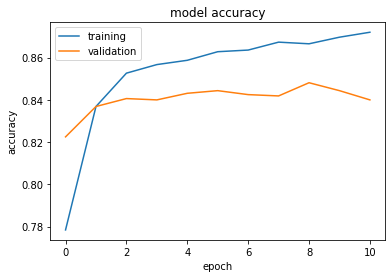

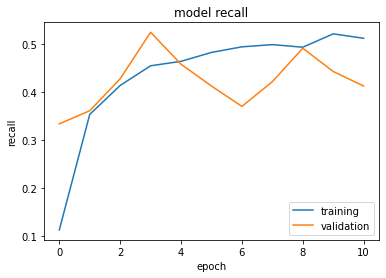

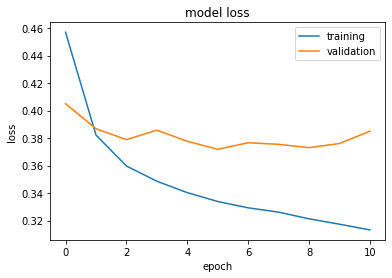

In [33]:
# monitor accuracy, recall, and loss throughout the epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

The loss function looks much better and smoother with the early stopping. I think we may be able to get less overfitting with normalization techniques as well.

### Final Model with Normalization & Weight Initialization

In [34]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Initializing the model
model = Sequential()
# Adding input layer with 64 neurons, relu as activation function, and he_normal initialization
model.add(Dense(64, activation='relu', kernel_initializer='he_normal', input_shape = (13,)))
# Adding Dropout with 20%, this can help reduce overfitting
model.add(Dropout(0.2))
# Adding the first hidden layer with 32 neurons, relu as activation function, and he_normal initialization 
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
# Adding Dropout with 20%, this can help reduce overfitting
model.add(Dropout(0.2))
# Adding the second hidden layer with 32 neurons, relu as activation function, and he_normal initialization 
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
# Adding Batch Normalization, which can help reduce overfitting
model.add(BatchNormalization())
# Adding the output layer with one neuron and sigmoid as activation
model.add(Dense(1, activation='sigmoid'))

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                        

In [35]:
# Initializing the Optimizer
optimizer = Adam(learning_rate = 0.001)
# Compiling the model with 'mse' as loss function and metrics
model.compile(loss = losses.binary_crossentropy,
              optimizer = optimizer,
              metrics = ["Recall", 'accuracy'])
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta = 0.001, patience = 5)
# Fitting the model on train and validation with 50 epochs
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 50, verbose = 1, callbacks = es_cb)

Epoch 1/50
200/200 [==============================] - 2s 6ms/step - loss: 0.6088 - recall: 0.3065 - accuracy: 0.6814 - val_loss: 0.4504 - val_recall: 0.1030 - val_accuracy: 0.8031
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4604 - recall: 0.2082 - accuracy: 0.7950 - val_loss: 0.4179 - val_recall: 0.1212 - val_accuracy: 0.8094
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4258 - recall: 0.2260 - accuracy: 0.8112 - val_loss: 0.3976 - val_recall: 0.2364 - val_accuracy: 0.8238
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4055 - recall: 0.2964 - accuracy: 0.8214 - val_loss: 0.3874 - val_recall: 0.3061 - val_accuracy: 0.8350
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3970 - recall: 0.3158 - accuracy: 0.8277 - val_loss: 0.3827 - val_recall: 0.3242 - val_accuracy: 0.8369
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3894 - recall: 0.3754 - 

In [36]:
# predicting the model on test data
y_pred = model.predict(X_test)

# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1585
           1       0.00      0.00      0.00       415

    accuracy                           0.79      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.79      0.70      2000



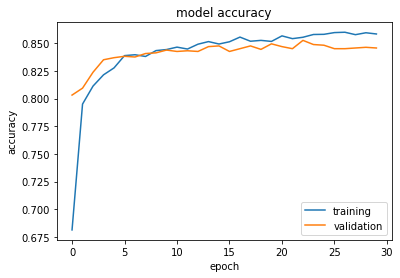

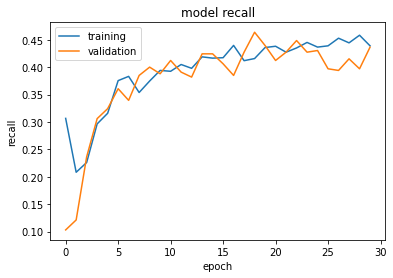

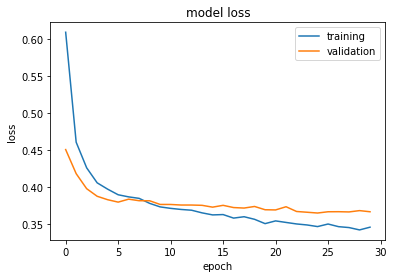

In [37]:
# monitor accuracy, recall, and loss throughout the epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

Now our validation and training curves are very similar, which is a sign we have reduced a lot of the overfitting using batch normalization. The loss curves are much smoother now as well, and show little sign of overfitting, which is great!

## Final Takeaways

Even though our classification accuracy was unchanged throughout all three models, we saw some great improvements in our model performance through techniques like weight initialization, early stopping, and normalization. These techniques help reduce overfitting in our model as well as help the model learn better. We see improvements in the loss curves of training vs validation sets through the epochs when implementing weight initialization and early stopping. This created a much better looking set of curves, and smoothed the loss curves out. However, the most noticeable improvement was the implementation of normalization techniques of dropout and batch normalization. These techniques helped create much better looking loss curves, and ultimately reduced the overfitting of our model a great amount. This is an important acheivement with a complex algorithm like neural networks, which are prone to overfitting! Unfortunately, the neural network models do not provide much in terms of interpretability, so there are not any business reccomendations from this model outside of those in the EDA.